### Chapter 2 - Approaching Almost ANy ML Problem

### Importance of Cross Validation

In [2]:
import pandas as pd
import numpy as np

import seaborn as sn
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn import datasets
from sklearn import manifold

In [5]:
data = pd.read_csv('/Users/shankarmanoharan/Kaggle/Redwine_Dataset.csv')

In [7]:
data['quality'].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

In [12]:
data.columns.to_list()

['fixed acidity',
 'volatile acidity',
 'citric acid',
 'residual sugar',
 'chlorides',
 'free sulfur dioxide',
 'total sulfur dioxide',
 'density',
 'pH',
 'sulphates',
 'alcohol',
 'quality']

In [9]:
quality_Mapping = {
    3: 0, 
    4: 1,
    5: 2,
    6: 3,
    7: 4,
    8: 5    
}
data.loc[:,'quality'] = data.quality.map(quality_Mapping)

In [10]:
data.shape

(1599, 12)

In [11]:
data = data.sample(frac=1).reset_index(drop=True)
data_train = data.head(1000)
data_test = data.tail(599)

In [13]:
from sklearn import tree
from sklearn import metrics

In [23]:
clf = tree.DecisionTreeClassifier(max_depth=3)
cols = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides',
         'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol' ]
#Train
clf.fit(data_train[cols],data_train.quality)

#Evaluate
Train_pred = clf.predict(data_train[cols])
Test_pred = clf.predict(data_test[cols])
Train_accuracy = metrics.accuracy_score(data_train.quality,Train_pred)
Test_accuracy = metrics.accuracy_score(data_test.quality,Test_pred)
print('Train accuracy:',Train_accuracy)
print('Test_accuracy:',Test_accuracy)

Train accuracy: 0.59
Test_accuracy: 0.5542570951585977


In [24]:
clf = tree.DecisionTreeClassifier(max_depth=7)
cols = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides',
         'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol' ]
#Train
clf.fit(data_train[cols],data_train.quality)

#Evaluate
Train_pred = clf.predict(data_train[cols])
Test_pred = clf.predict(data_test[cols])
Train_accuracy = metrics.accuracy_score(data_train.quality,Train_pred)
Test_accuracy = metrics.accuracy_score(data_test.quality,Test_pred)
print('Train accuracy:',Train_accuracy)
print('Test_accuracy:',Test_accuracy)

Train accuracy: 0.752
Test_accuracy: 0.5742904841402338


In [ ]:
### Cross Validation proof

In [26]:
import matplotlib
import seaborn as sns
%matplotlib inline
matplotlib.rc('xtick',labelsize=20)
matplotlib.rc('ytick',labelsize=20)

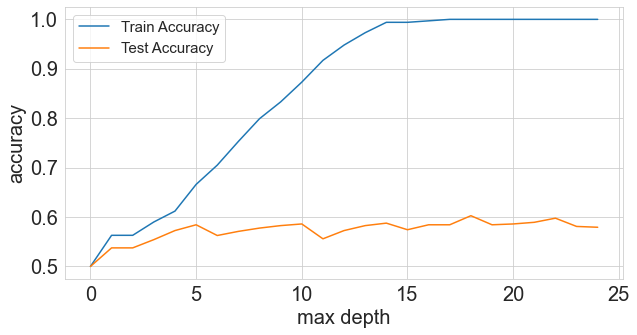

In [28]:
train_accuracies = [0.5]
test_accuracies = [0.5]
for depth in range(1,25):
    clf = tree.DecisionTreeClassifier(max_depth=depth)
    cols = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides',
         'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol' ]
    #Train
    clf.fit(data_train[cols],data_train.quality)
    #Evaluate
    Train_pred = clf.predict(data_train[cols])
    Test_pred = clf.predict(data_test[cols])
    train_accuracy = metrics.accuracy_score(data_train.quality,Train_pred)
    Test_accuracy = metrics.accuracy_score(data_test.quality,Test_pred)
    train_accuracies.append(train_accuracy)
    test_accuracies.append(Test_accuracy)
plt.figure(figsize=(10,5))
sns.set_style("whitegrid")
plt.plot(train_accuracies,label="Train Accuracy")
plt.plot(test_accuracies,label="Test Accuracy")
plt.legend(loc="upper left",prop={'size':15})
plt.xticks(range(0,26,5))
plt.xlabel("max depth",size=20)
plt.ylabel("accuracy",size=20)
plt.show()           

### K fold Cross validation method

In [43]:
from sklearn import model_selection
data1 = pd.read_csv('/Users/shankarmanoharan/Kaggle/Redwine_Dataset.csv')
data1['kfold'] = -1
data1 = data1.sample(frac=1).reset_index(drop=True)
kf = model_selection.KFold(n_splits=3)

In [44]:
for fold, (trn_,val_) in enumerate(kf.split(X=data1)):
    data1.loc[val_,'kfold'] = fold

In [45]:
data1['kfold'].value_counts()

0    533
1    533
2    533
Name: kfold, dtype: int64

In [46]:
data1.columns.to_list()

['fixed acidity',
 'volatile acidity',
 'citric acid',
 'residual sugar',
 'chlorides',
 'free sulfur dioxide',
 'total sulfur dioxide',
 'density',
 'pH',
 'sulphates',
 'alcohol',
 'quality',
 'kfold']

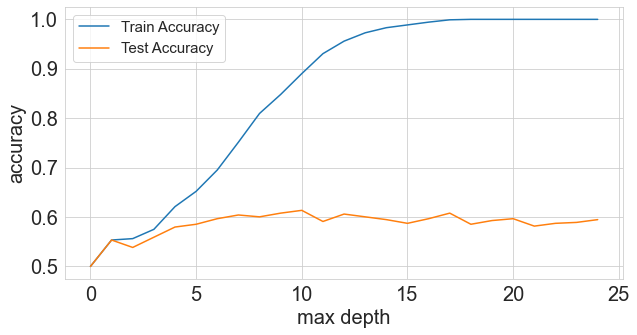

In [47]:
quality_Mapping = {
    3: 0, 
    4: 1,
    5: 2,
    6: 3,
    7: 4,
    8: 5    
}
data1.loc[:,'quality'] = data1.quality.map(quality_Mapping)
data1_train = data1[data1['kfold'].isin([0,1])]
data1_train = data1_train.reset_index(drop=True)
data1_test = data1[data1['kfold'].isin([2])]
data1_test = data1_test.reset_index(drop=True)
train_accuracies = [0.5]
test_accuracies = [0.5]
for depth in range(1,25):
    clf = tree.DecisionTreeClassifier(max_depth=depth)
    cols = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide',
            'density', 'pH', 'sulphates', 'alcohol']
    #Train
    clf.fit(data1_train[cols],data1_train.quality)
    #Evaluate
    Train_pred = clf.predict(data1_train[cols])
    Test_pred = clf.predict(data1_test[cols])
    train_accuracy = metrics.accuracy_score(data1_train.quality,Train_pred)
    Test_accuracy = metrics.accuracy_score(data1_test.quality,Test_pred)
    train_accuracies.append(train_accuracy)
    test_accuracies.append(Test_accuracy)
plt.figure(figsize=(10,5))
sns.set_style("whitegrid")
plt.plot(train_accuracies,label="Train Accuracy")
plt.plot(test_accuracies,label="Test Accuracy")
plt.legend(loc="upper left",prop={'size':15})
plt.xticks(range(0,26,5))
plt.xlabel("max depth",size=20)
plt.ylabel("accuracy",size=20)
plt.show()       

Text(0, 0.5, 'count')

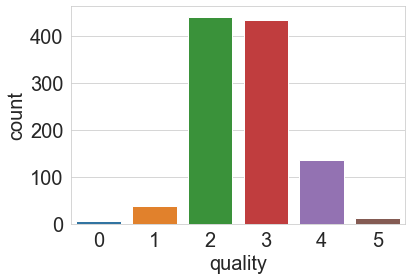

In [48]:
b = sns.countplot(x='quality', data=data1_train)
b.set_xlabel("quality",fontsize=20)
b.set_ylabel("count",fontsize=20)

Text(0, 0.5, 'count')

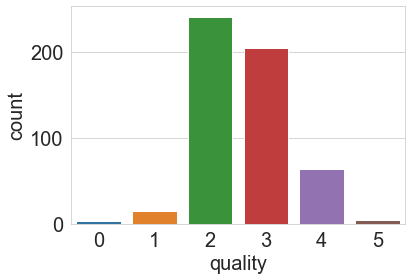

In [49]:
b = sns.countplot(x='quality', data=data1_test)
b.set_xlabel("quality",fontsize=20)
b.set_ylabel("count",fontsize=20)

### Stratified K fold Cross validation method

In [51]:
from sklearn import model_selection
data1 = pd.read_csv('/Users/shankarmanoharan/Kaggle/Redwine_Dataset.csv')
data1['kfold'] = -1
data1 = data1.sample(frac=1).reset_index(drop=True)
y=data1.quality.values
kf = model_selection.StratifiedKFold(n_splits=3)
for fold, (trn_,val_) in enumerate(kf.split(X=data1,y=y)):
    data1.loc[val_,'kfold'] = fold

In [52]:
data1['kfold'].value_counts()

0    533
1    533
2    533
Name: kfold, dtype: int64

In [53]:
data1.columns.to_list()

['fixed acidity',
 'volatile acidity',
 'citric acid',
 'residual sugar',
 'chlorides',
 'free sulfur dioxide',
 'total sulfur dioxide',
 'density',
 'pH',
 'sulphates',
 'alcohol',
 'quality',
 'kfold']

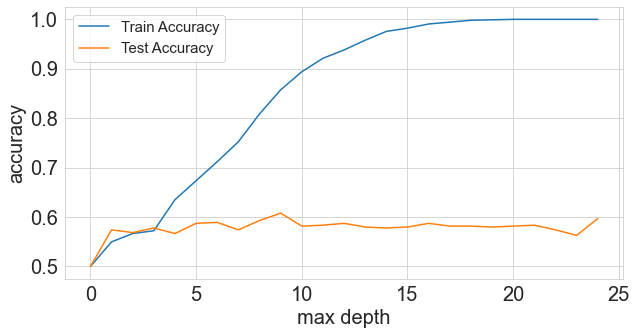

In [54]:
quality_Mapping = {
    3: 0, 
    4: 1,
    5: 2,
    6: 3,
    7: 4,
    8: 5    
}
data1.loc[:,'quality'] = data1.quality.map(quality_Mapping)
data1_train = data1[data1['kfold'].isin([0,1])]
data1_train = data1_train.reset_index(drop=True)
data1_test = data1[data1['kfold'].isin([2])]
data1_test = data1_test.reset_index(drop=True)
train_accuracies = [0.5]
test_accuracies = [0.5]
for depth in range(1,25):
    clf = tree.DecisionTreeClassifier(max_depth=depth)
    cols = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide',
            'density', 'pH', 'sulphates', 'alcohol']
    #Train
    clf.fit(data1_train[cols],data1_train.quality)
    #Evaluate
    Train_pred = clf.predict(data1_train[cols])
    Test_pred = clf.predict(data1_test[cols])
    train_accuracy = metrics.accuracy_score(data1_train.quality,Train_pred)
    Test_accuracy = metrics.accuracy_score(data1_test.quality,Test_pred)
    train_accuracies.append(train_accuracy)
    test_accuracies.append(Test_accuracy)
plt.figure(figsize=(10,5))
sns.set_style("whitegrid")
plt.plot(train_accuracies,label="Train Accuracy")
plt.plot(test_accuracies,label="Test Accuracy")
plt.legend(loc="upper left",prop={'size':15})
plt.xticks(range(0,26,5))
plt.xlabel("max depth",size=20)
plt.ylabel("accuracy",size=20)
plt.show() 